In [2]:
#Ques1 answer-

In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")


In [11]:
df=pd.read_csv(r"F:\baseball.csv",sep=",")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [12]:
df.shape

(30, 17)

In [13]:
#Observation- The dataset has 30 rows and 17 columns

In [14]:
#Let's remove duplicates first ,this will also help to work better on outliers

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(30, 17)

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [18]:
#Observations
#All counts are equal
#Standard Deviation < Mean in all columns


In [19]:
#check for any null
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [20]:
#EDA Analysis:
#No Null present in our Dataframe
#ALl data are numerical , so, We don't need further Encoding
# Standardisation is required
# It is a regression problem, (as one column[W] has continuous type data)

<Axes: xlabel='W', ylabel='count'>

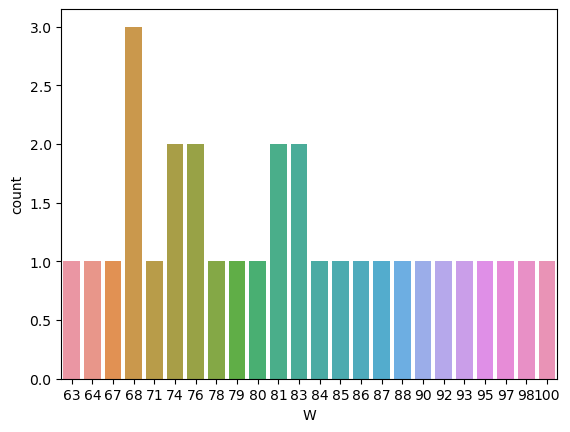

In [21]:
#Frequency of winnngs in column [W]
sns.countplot(data=df, x='W')

In [22]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

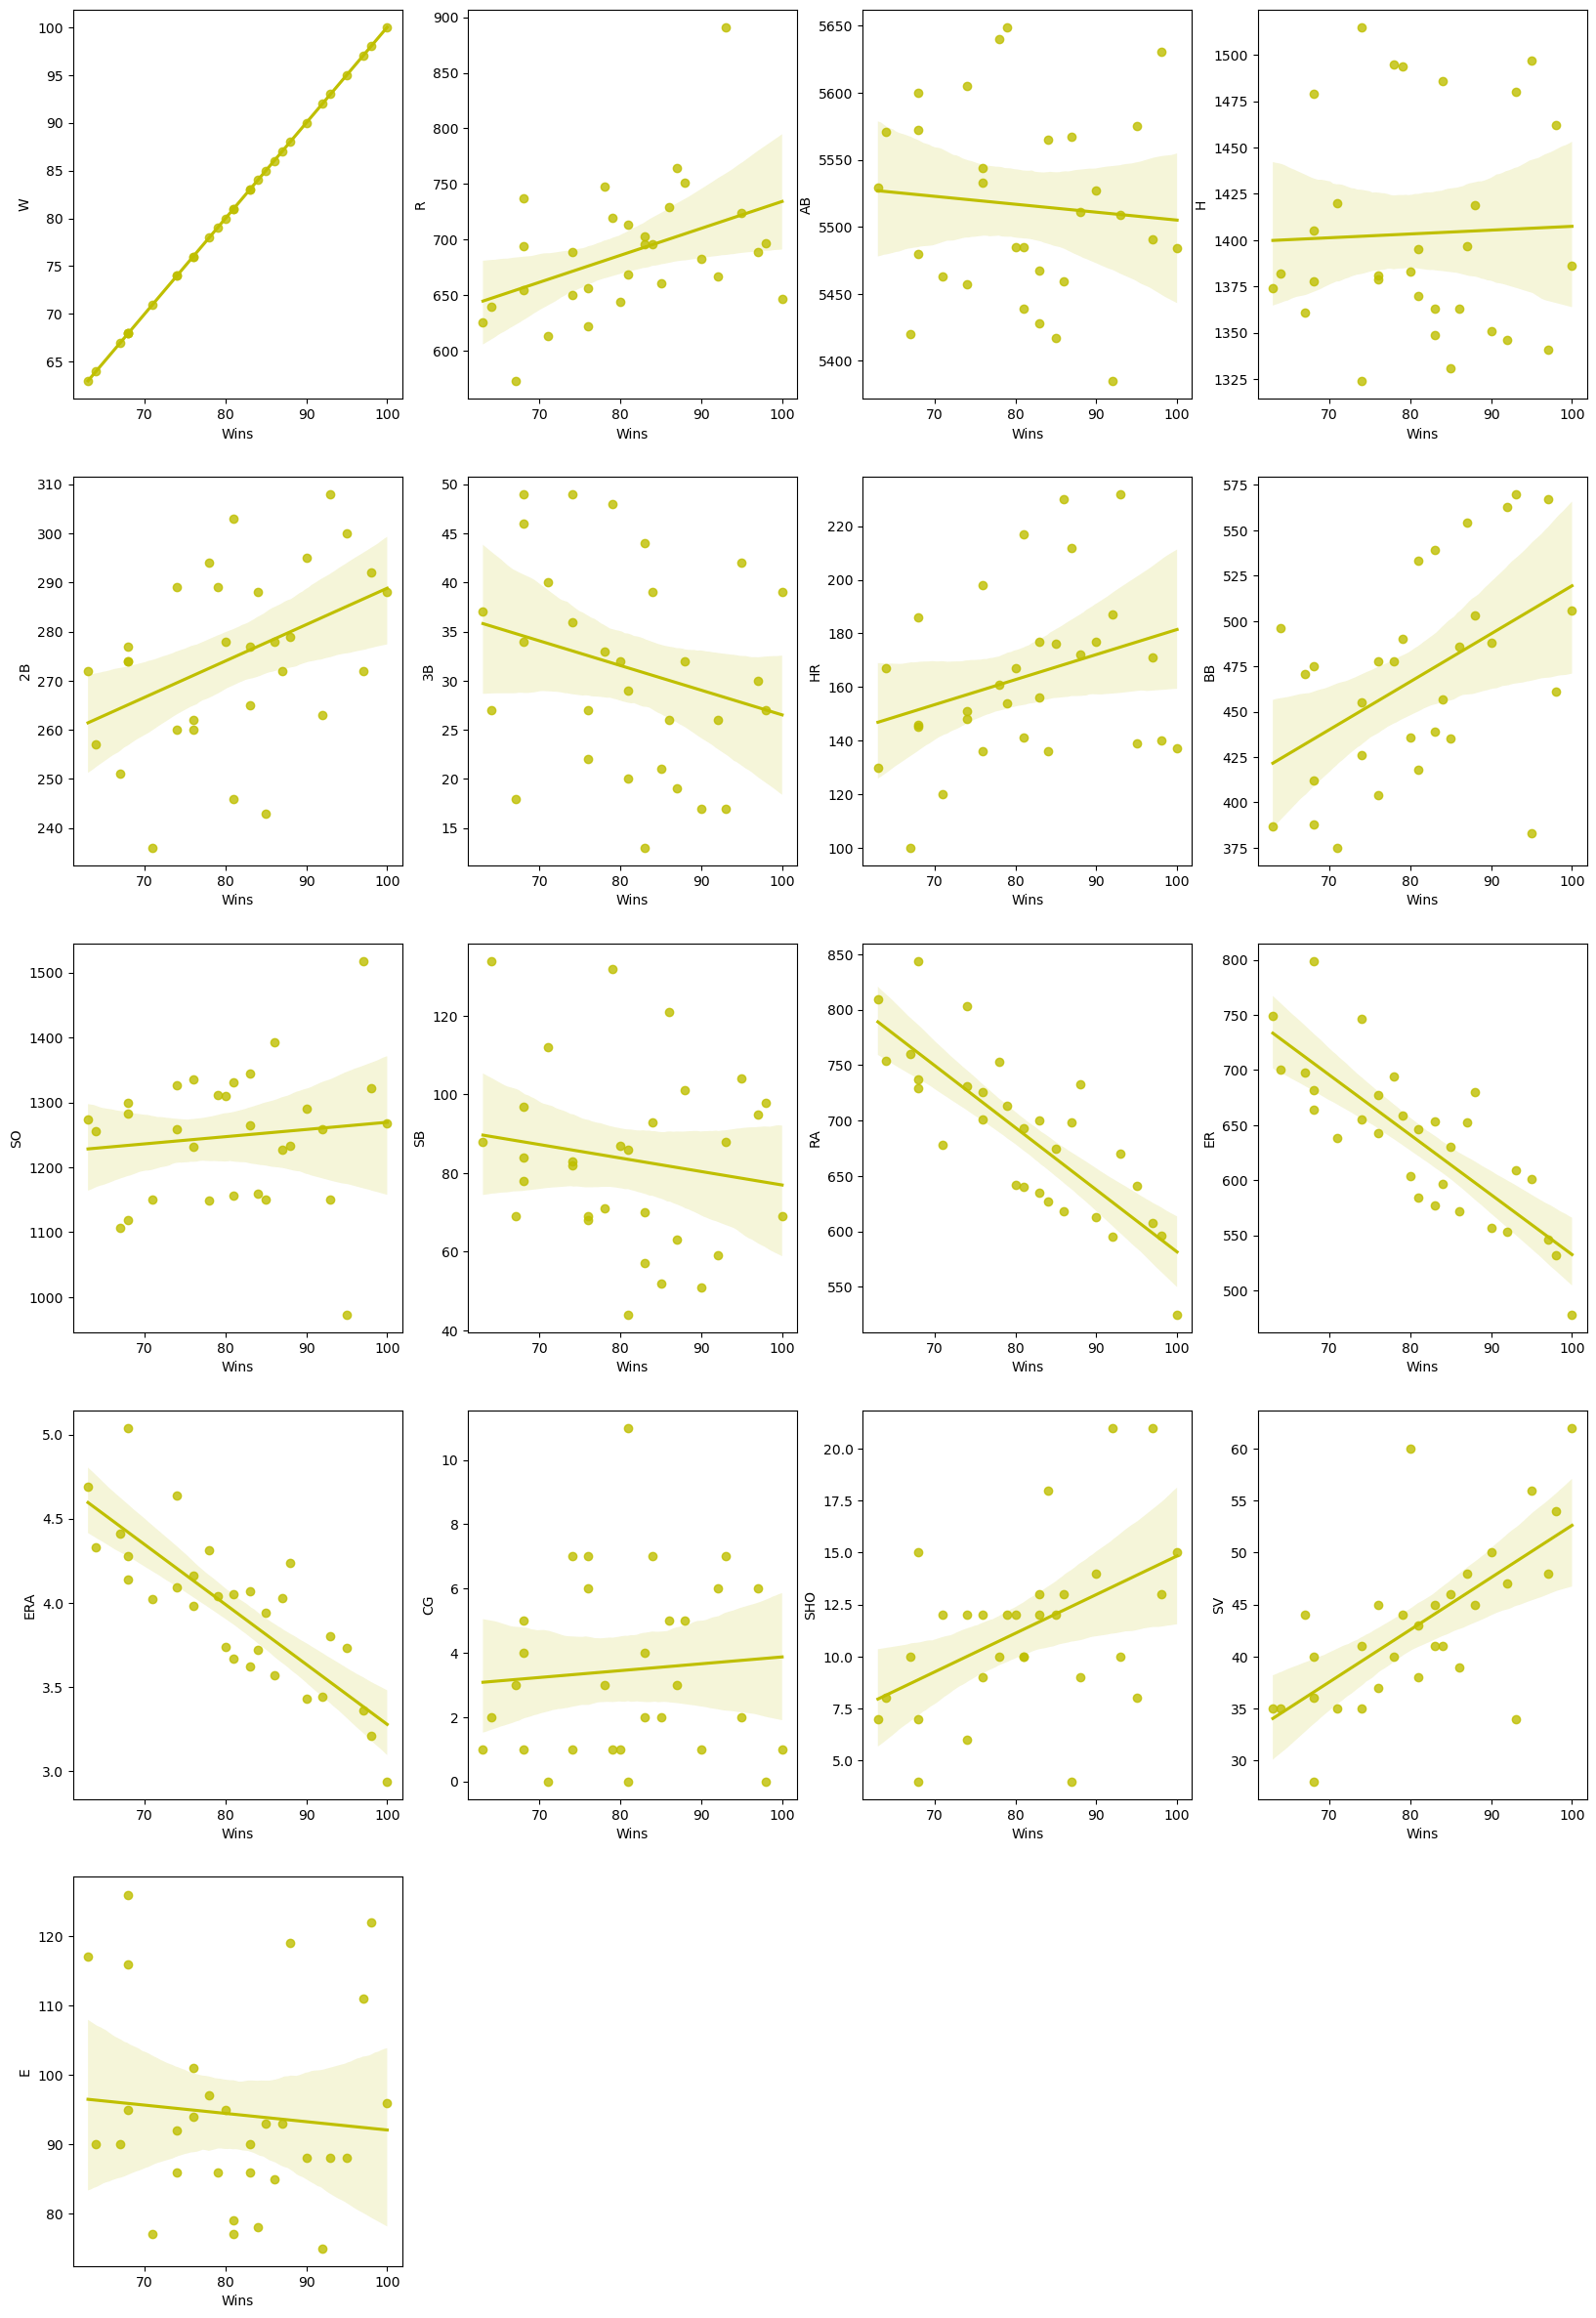

In [23]:
#Relation betweeen all features and label:

plt.figure(figsize=(20,30))
a=1
for i in df:
    if a<=17:
        plt.subplot(5,4,a)
        sns.regplot(x='W',y=i,data=df,color='y')
        plt.xlabel("Wins")
        plt.ylabel(i)
    a+=1
    
plt.show()
        

In [24]:
#Observations:
#AB,3B,RA, ER,ERA,E have negative relation with 'W'
#R, 2B, HR, BB, SHO ,SV have highly positive relation
#So and E has slightly positive and negative relations respectively

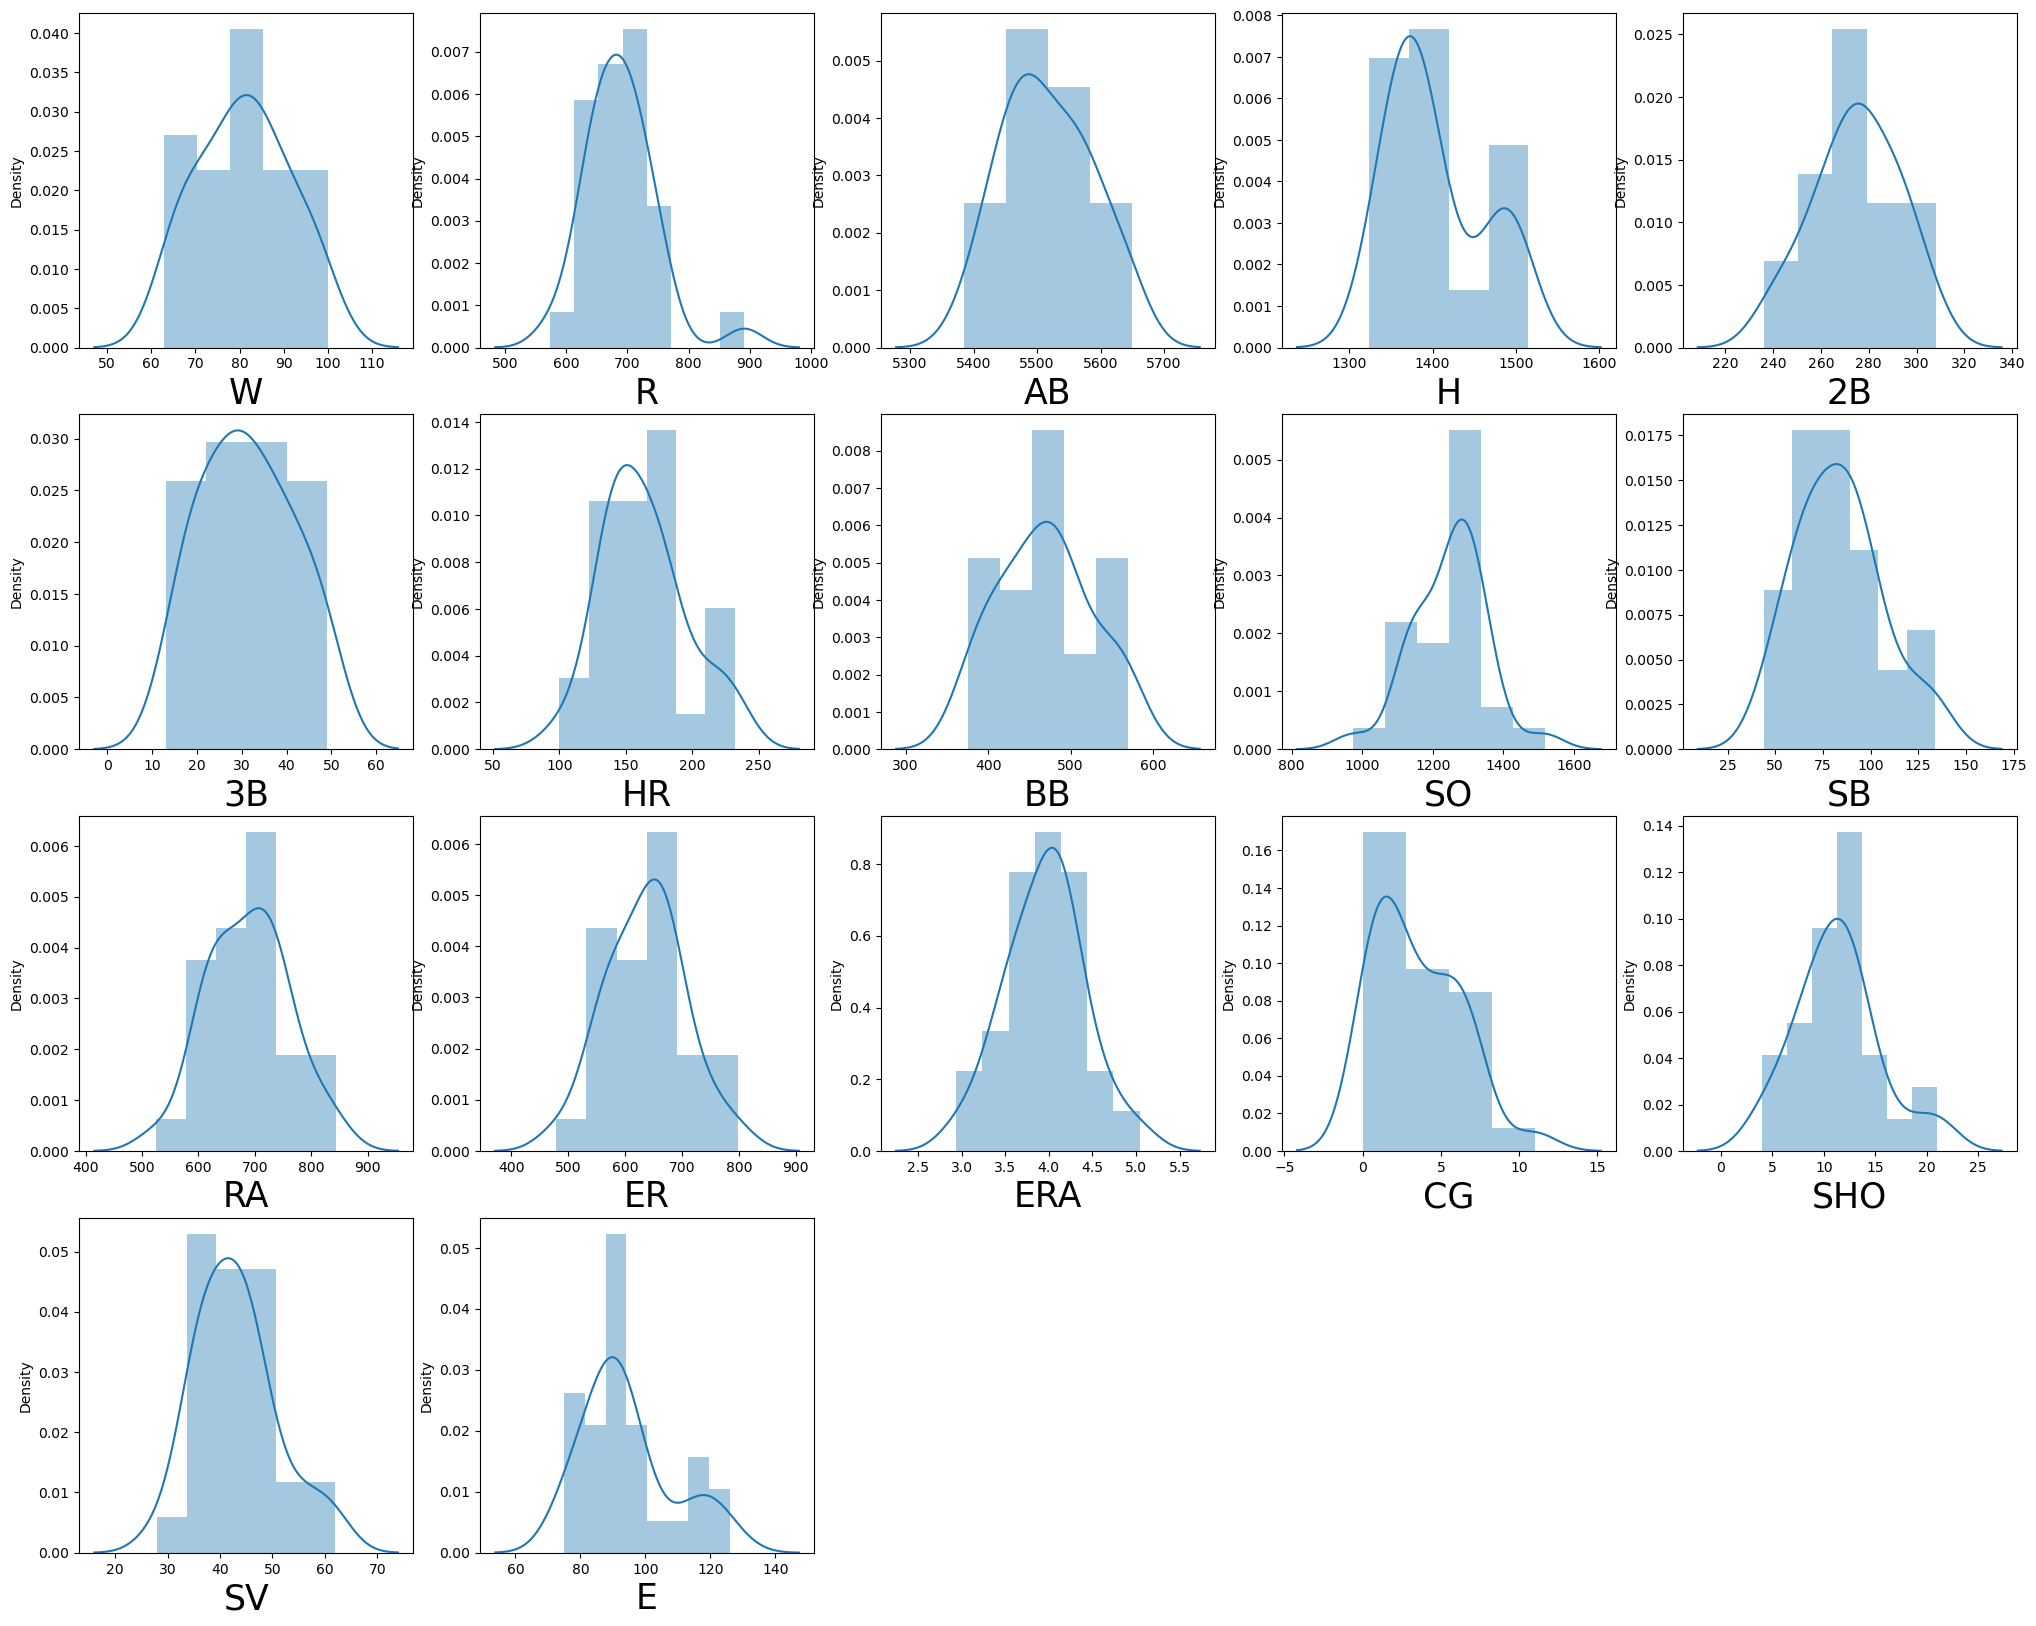

In [25]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=17:
       a=plt.subplot(4,5,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [26]:
#Graphs of E,SO, H have some outliers rest are good
#We will proceed with feature selection

In [27]:
#BEST FEATURE SELECTION

In [28]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
x=df.drop('W',axis=1)
y=df.W

In [29]:
# Getting best features
spercentile=SelectPercentile(score_func=chi2,percentile=90)
spercentile=spercentile.fit(x,y)
bestf=spercentile.get_support(indices=True)

In [30]:
# Our new data frame containing 14 features:
feature=x.columns[bestf]
df_new=x[feature]
df_new['W']=df['W']
df_new 

,R,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,W
0,724,1497,300,42,139,383,973,104,641,601,2,8,56,88,95
1,696,1349,277,44,156,439,1264,70,700,653,2,12,45,86,83
2,669,1395,303,29,141,533,1157,86,640,584,11,10,38,79,81
3,622,1381,260,27,136,404,1231,68,701,643,7,9,37,101,76
4,689,1515,289,49,151,455,1259,83,803,746,7,12,35,86,74
5,891,1480,308,17,232,570,1151,88,670,609,7,10,34,88,93
6,764,1397,272,19,212,554,1227,63,698,652,3,4,48,93,87
7,713,1370,246,20,217,418,1331,44,693,646,0,10,43,77,81
8,644,1383,278,32,167,436,1310,87,642,604,1,12,60,95,80
9,748,1495,294,33,161,478,1148,71,753,694,3,10,40,97,78


In [31]:
#Now We will chech the corelation between features using Corr()
df_new.corr()

,R,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,W
R,1.000000,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,0.232042,-0.103274,-0.096380,-0.023262,0.430751
H,0.482856,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,-0.016659,-0.636862,-0.616224,0.198996,-0.812952
ER,-0.041245,0.252489,-0.235531,0.340225,-0.085922,-0.452663,-0.161612,0.143068,0.991018,1.000000,-0.020221,-0.630192,-0.589663,0.136921,-0.809435


In [32]:
#A hit map for more clarification:

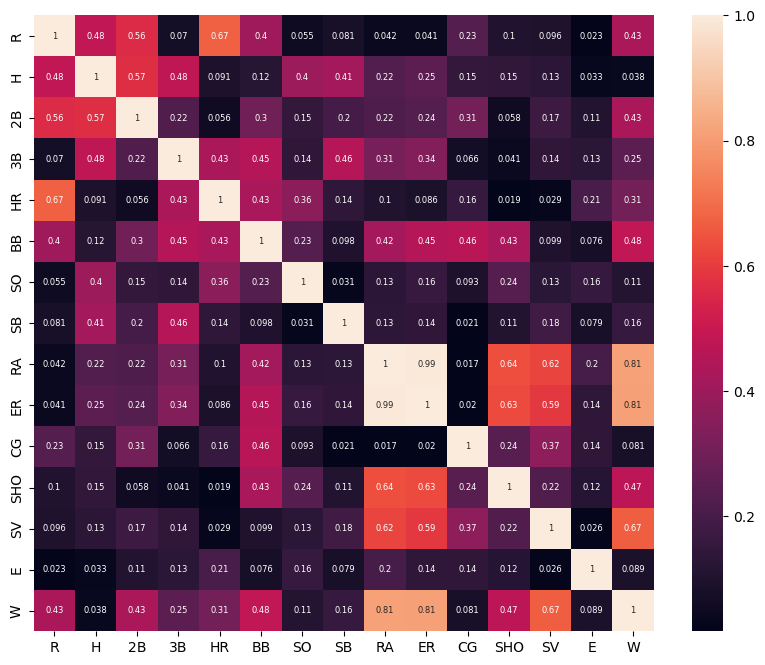

In [33]:
dfheat= df_new.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(dfheat, annot=True, annot_kws={'size':6})
plt.show()

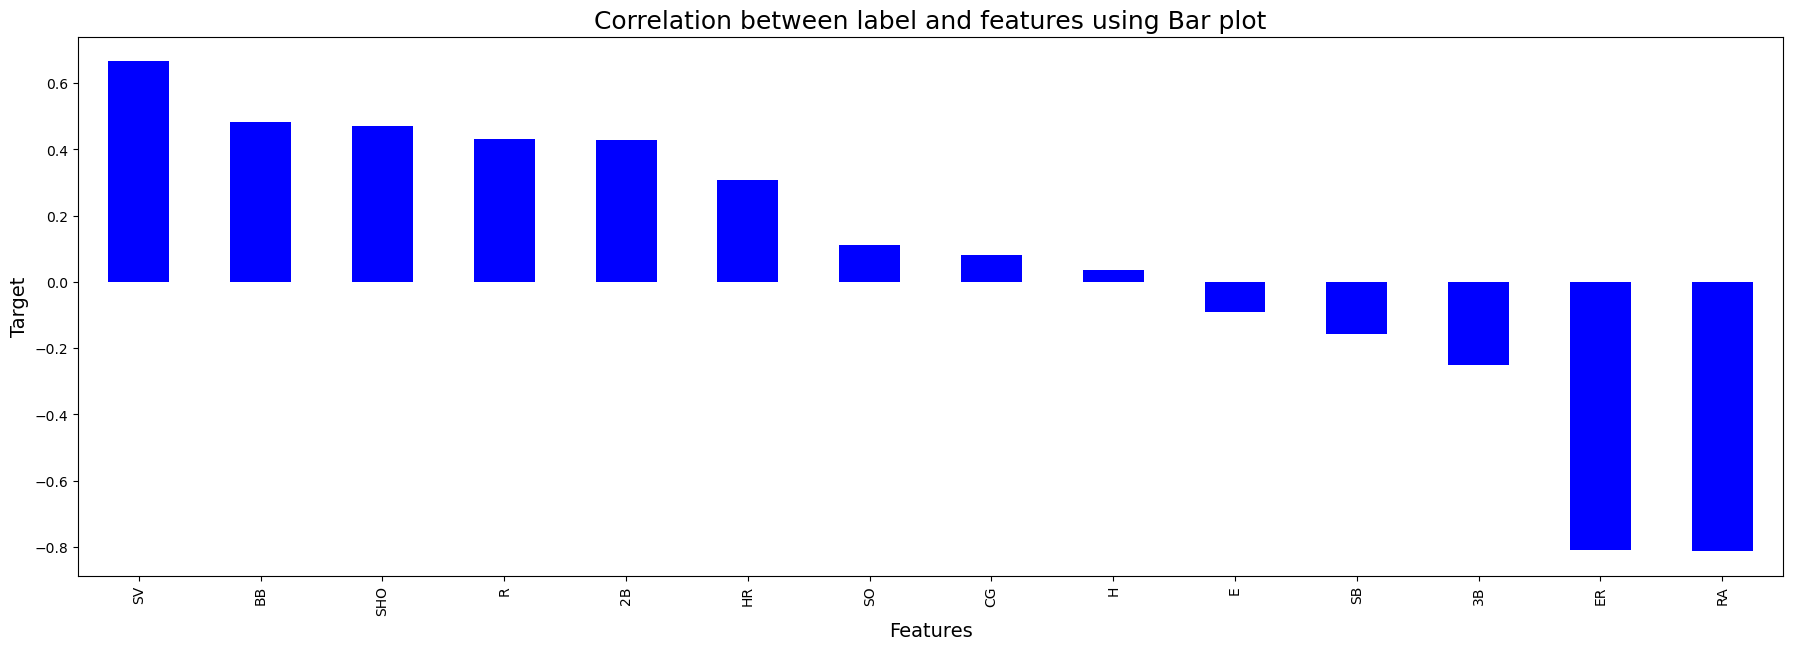

In [34]:
# Let us visualise the the correlation between Label and other features
plt.figure(figsize=(22,7))
df_new.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

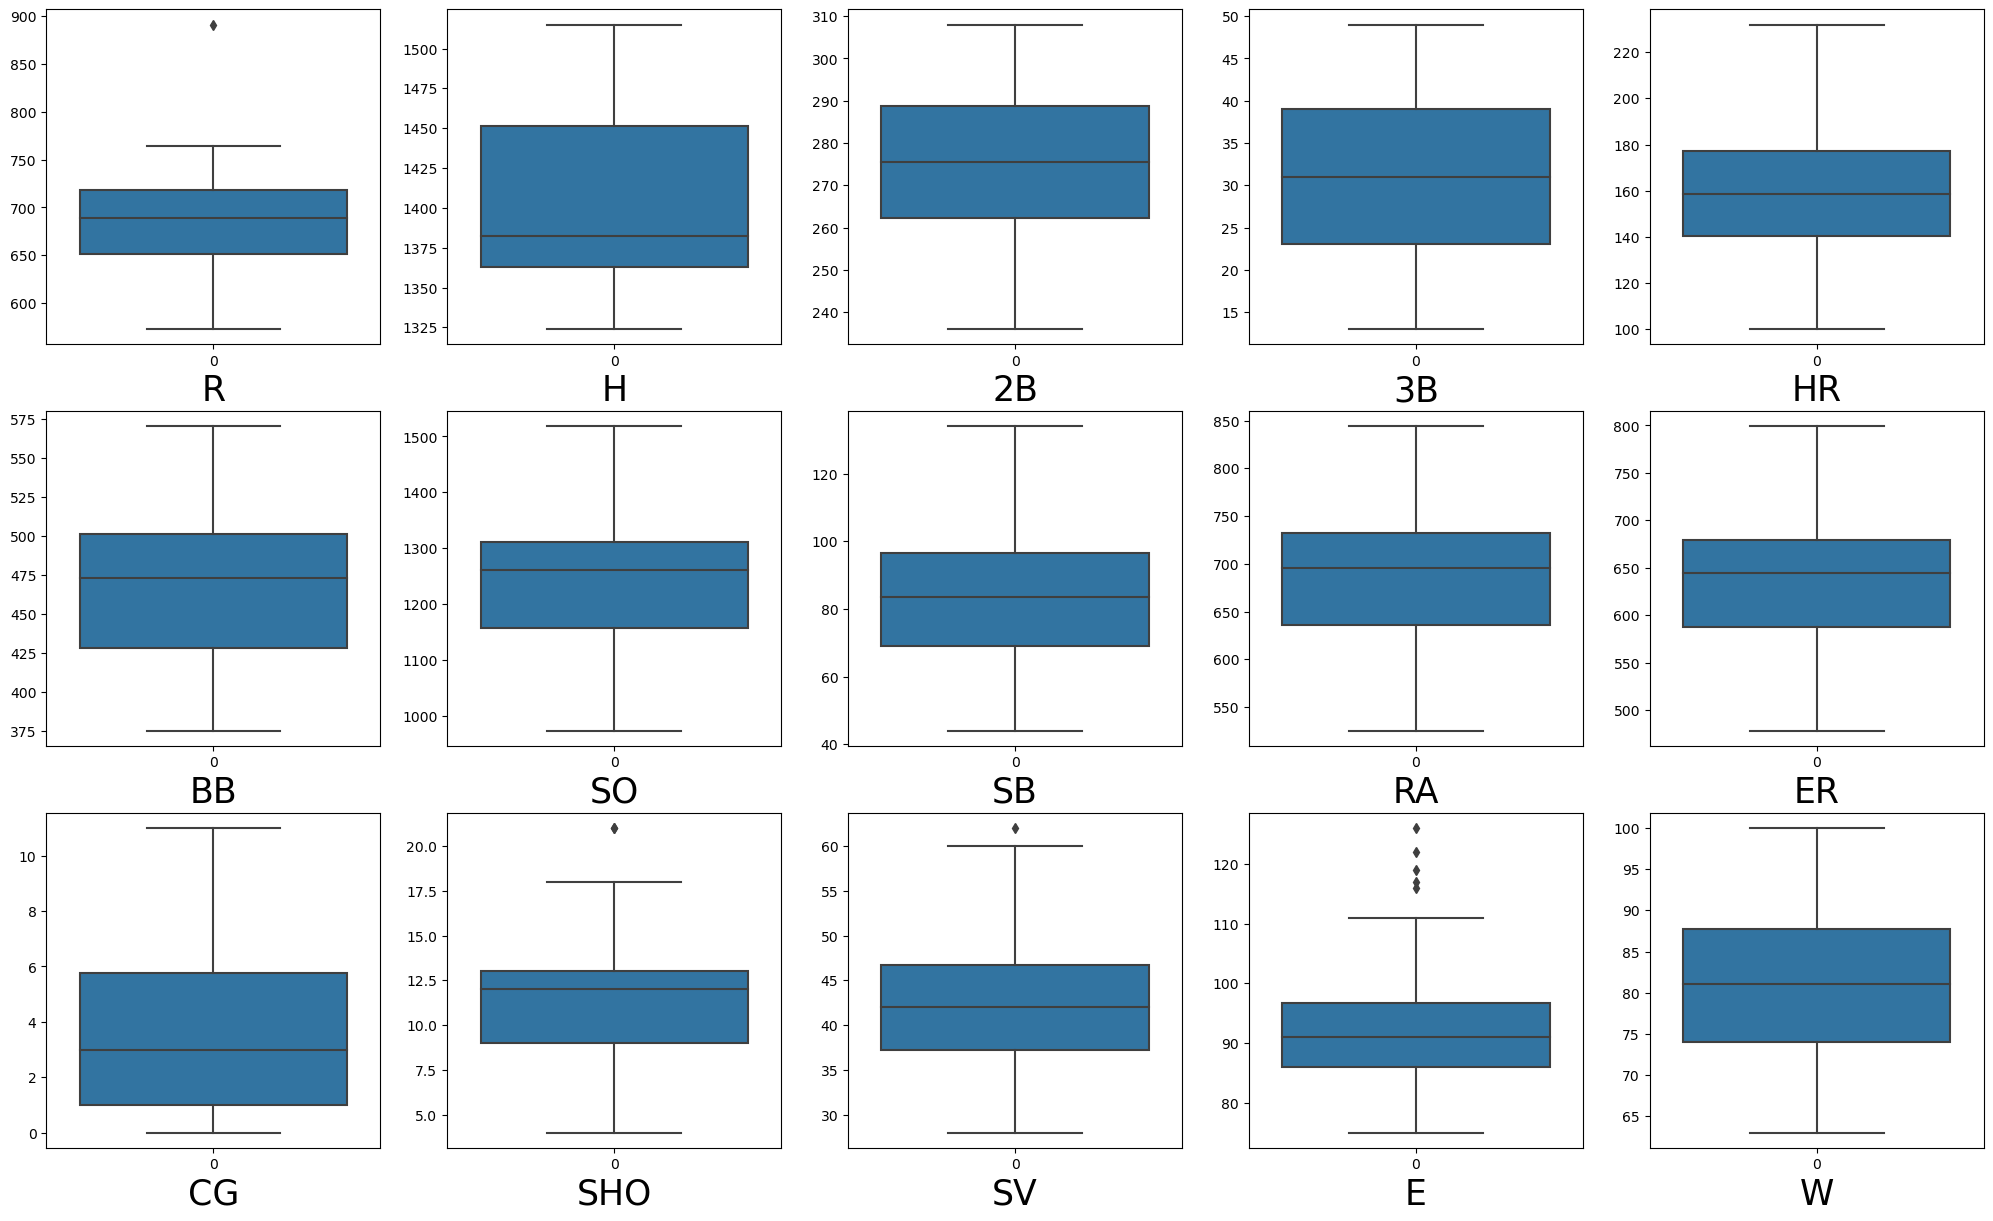

In [35]:
plt.figure(figsize=(25,20))
plot=1

for column in df_new:
   if plot<=17:
       a=plt.subplot(4,5,plot)
       sns.boxplot(df_new[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [36]:
#Observations:
#As we can see  E,R ,SHO  has some outliers and rest are okay

In [37]:
q3=df_new.quantile(0.75)
q1=df_new.quantile(0.25)
iqr=q3-q1
iqr

R       67.00
H       88.50
2B      26.50
3B      16.00
HR      36.75
BB      73.00
SO     154.00
SB      27.50
RA      96.25
ER      92.00
CG       4.75
SHO      4.00
SV       9.50
E       10.75
W       13.75
dtype: float64

In [38]:
r= (q3[0] + (1.5 * iqr[0]))
print(r)

818.75


In [39]:
row=df_new['R']

In [40]:
index= np.where(row>r)
print(index)
df_new= df_new.drop(df_new.index[index])
df_new.reset_index()

(array([5], dtype=int64),)


,index,R,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,W
0,0,724,1497,300,42,139,383,973,104,641,601,2,8,56,88,95
1,1,696,1349,277,44,156,439,1264,70,700,653,2,12,45,86,83
2,2,669,1395,303,29,141,533,1157,86,640,584,11,10,38,79,81
3,3,622,1381,260,27,136,404,1231,68,701,643,7,9,37,101,76
4,4,689,1515,289,49,151,455,1259,83,803,746,7,12,35,86,74
5,6,764,1397,272,19,212,554,1227,63,698,652,3,4,48,93,87
6,7,713,1370,246,20,217,418,1331,44,693,646,0,10,43,77,81
7,8,644,1383,278,32,167,436,1310,87,642,604,1,12,60,95,80
8,9,748,1495,294,33,161,478,1148,71,753,694,3,10,40,97,78
9,10,751,1419,279,32,172,503,1233,101,733,680,5,9,45,119,88


In [41]:
e= (q3[13] + (1.5 * iqr[13]))
print(e)

112.875


In [42]:
row1=df_new['E']
index= np.where(row1>e)
print(index)
df_new= df_new.drop(df_new.index[index])
df_new.reset_index()

(array([ 9, 13, 15, 17, 23], dtype=int64),)


,index,R,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,W
0,0,724,1497,300,42,139,383,973,104,641,601,2,8,56,88,95
1,1,696,1349,277,44,156,439,1264,70,700,653,2,12,45,86,83
2,2,669,1395,303,29,141,533,1157,86,640,584,11,10,38,79,81
3,3,622,1381,260,27,136,404,1231,68,701,643,7,9,37,101,76
4,4,689,1515,289,49,151,455,1259,83,803,746,7,12,35,86,74
5,6,764,1397,272,19,212,554,1227,63,698,652,3,4,48,93,87
6,7,713,1370,246,20,217,418,1331,44,693,646,0,10,43,77,81
7,8,644,1383,278,32,167,436,1310,87,642,604,1,12,60,95,80
8,9,748,1495,294,33,161,478,1148,71,753,694,3,10,40,97,78
9,11,729,1363,278,26,230,486,1392,121,618,572,5,13,39,85,86


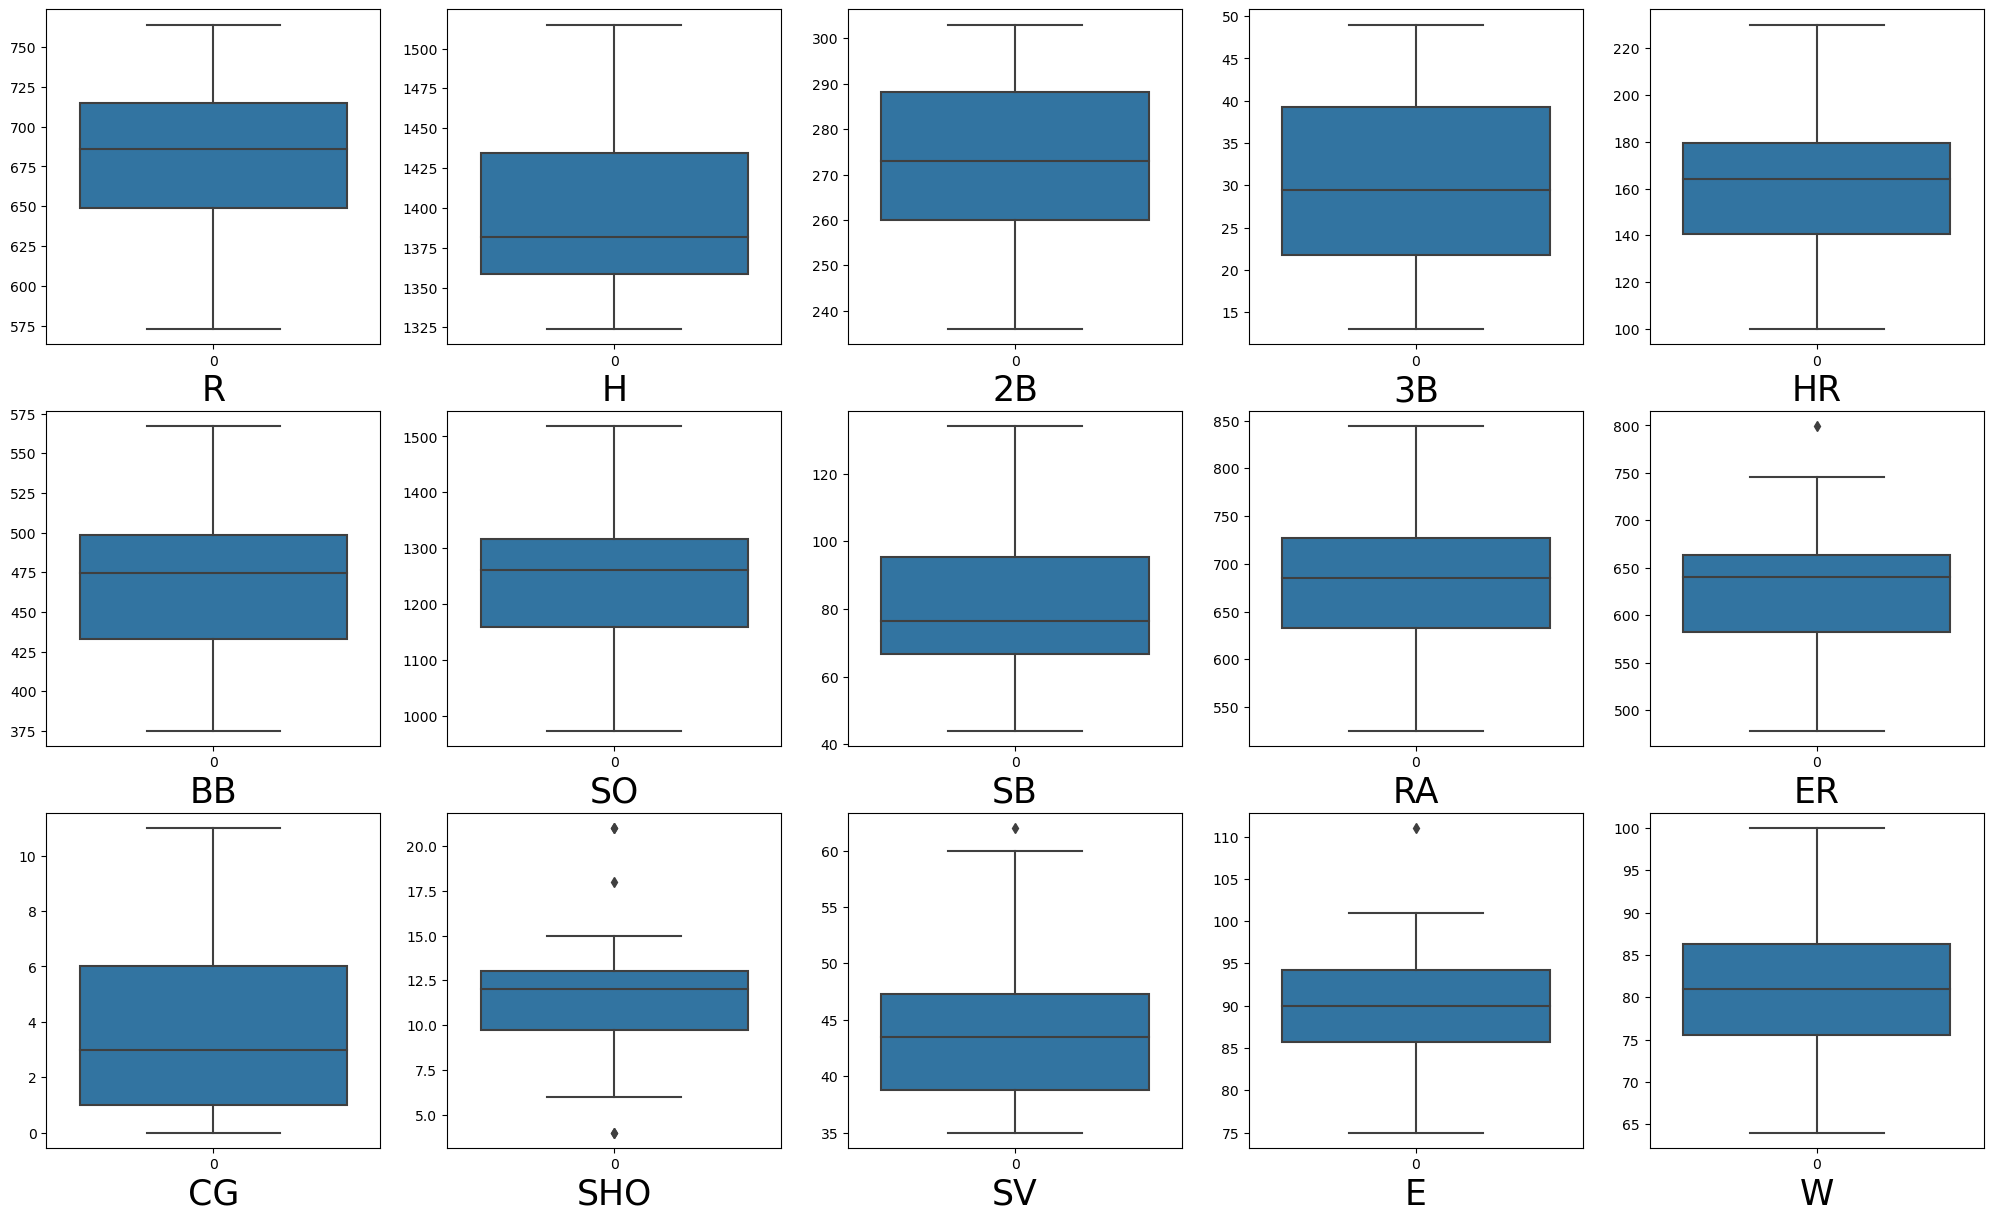

In [43]:
plt.figure(figsize=(25,20))
plot=1

for column in df_new:
   if plot<=17:
       a=plt.subplot(4,5,plot)
       sns.boxplot(df_new[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [44]:
#Let's divide it into Train and Test(Featues & Label)
x=df_new.drop(columns=['W'])
y=df_new['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
11     86
12     85
13     76
15    100
17     97
19     64
20     90
21     83
22     71
23     67
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [47]:
#STANDARD SCALARIZATION
import pandas as pd
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x = pd.DataFrame(s.fit_transform(x), columns=x.columns)
x

,R,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,0.966000,1.655299,1.511917,1.031560,-0.831732,-1.566515,-2.597907,0.896467,-0.581689,-0.446190,-0.563002,-0.846726,1.650925,-0.151654
1,0.343611,-0.857360,0.247405,1.220548,-0.273596,-0.550887,0.111738,-0.488982,0.251144,0.311423,-0.563002,0.098456,0.137577,-0.394302
2,-0.256550,-0.076398,1.676854,-0.196863,-0.766069,1.153916,-0.884592,0.162994,-0.595805,-0.693872,2.723714,-0.374135,-0.825462,-1.243567
3,-1.301275,-0.314082,-0.687235,-0.385851,-0.930226,-1.185655,-0.195541,-0.570479,0.265260,0.165728,1.262951,-0.610430,-0.963039,1.425552
4,0.188013,1.960892,0.907150,1.693018,-0.437754,-0.260708,0.065180,0.040748,1.705073,1.666385,1.262951,0.098456,-1.238193,-0.394302
5,1.855127,-0.042444,-0.027489,-1.141803,1.564969,1.534777,-0.232787,-0.774221,0.222912,0.296853,-0.197812,-1.791908,0.550308,0.454963
6,0.721490,-0.500834,-1.456939,-1.047309,1.729127,-0.931748,0.735608,-1.548443,0.152333,0.209436,-1.293384,-0.374135,-0.137577,-1.486214
7,-0.812255,-0.280127,0.302383,0.086620,0.087551,-0.605296,0.540067,0.203742,-0.567573,-0.402482,-0.928193,0.098456,2.201233,0.697611
8,1.499476,1.621344,1.182045,0.181114,-0.109438,0.156425,-0.968396,-0.448233,0.999282,0.908772,-0.197812,-0.374135,-0.550308,0.940258
9,1.077140,-0.619676,0.302383,-0.480345,2.155937,0.301514,1.303609,1.589191,-0.906353,-0.868705,0.532570,0.334752,-0.687885,-0.515625


In [48]:
# importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=40)

In [50]:
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [ ]:
# LINEAR REGRESSION MODEL

In [65]:
l = LinearRegression()
l.fit(x_train.values, y_train.values)


LinearRegression()

In [68]:
y_pred = l.predict(x_test)

In [70]:
print('R2_score:',r2_score(y_test,y_pred))



R2_score: 0.6779726141809144


In [126]:
#LASSO MODEL

In [127]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.7984349105906646


In [128]:
#RIDGE MODEL

In [129]:
rd=Ridge()
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.6622046309359298


In [130]:
#RANDOM FOREST MODEL

In [131]:

RF=RandomForestRegressor(random_state=9,n_estimators=2)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.5723120837297812


In [ ]:
#WE can see we are getting max accuracy in LASSO model 

In [132]:
#CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score
#Linear Regression CVS
print(cross_val_score(l,x,y,cv=5).mean())
#Random Forest Regression CVS
print(cross_val_score(RF,x,y,cv=5).mean())
#Ridge
print(cross_val_score(rd,x,y,cv=5).mean())
#Lasso
print(cross_val_score(lasso,x,y,cv=5).mean())

0.1001991628777823
-0.7828162915921506
0.47628951137110764
0.47552006431448185


In [133]:
#WE can conclude  Lasso as best model 

In [ ]:
#HYPERMETER TUNING

In [187]:
lass=Lasso()
lass

Lasso()

In [188]:
from sklearn.model_selection import GridSearchCV

param={'alpha':[1.0,.05,.4,2,6,10,20,30,45,50]
    }
lassoCV=GridSearchCV(lass,param,scoring='neg_mean_squared_error',cv=5)
lassoCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2, 6, 10, 20, 30, 45, 50]},
             scoring='neg_mean_squared_error')

In [189]:
print(lassoCV.best_params_)

{'alpha': 0.05}


In [190]:
print(lassoCV.best_score_)

-11.37155580499238


In [200]:
lasso_pred=lasso.predict(x_test)
print('R2_score:',r2_score(lasso_pred,y_test))

R2_score: 0.7990663240937658


In [ ]:
#Ques 2 answer-

In [2]:
df2=pd.read_csv(r"F:\avocado.csv",sep=",")
df2

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df2.shape

(18249, 14)

In [4]:
#Let's drop duplicates if any:
df2.drop_duplicates(inplace=True)
df2.shape

(18249, 14)

In [5]:
#check for any null
df2.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df2.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
#Observations:
# Mean > Standard deviation in all column exceptTotal Bags, Small Bags, Large Bags
#their is some extra deviated Data

In [39]:
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [9]:
#Drop unnamed that is of no use in our prediction
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
#Let's try imputers and encoders for changing datatype
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df2['Date'] = label.fit_transform(df2['Date'])
df2['type'] = label.fit_transform(df2['type'])
df2['region'] = label.fit_transform(df2['region'])
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [16]:
df2.shape

(18249, 13)

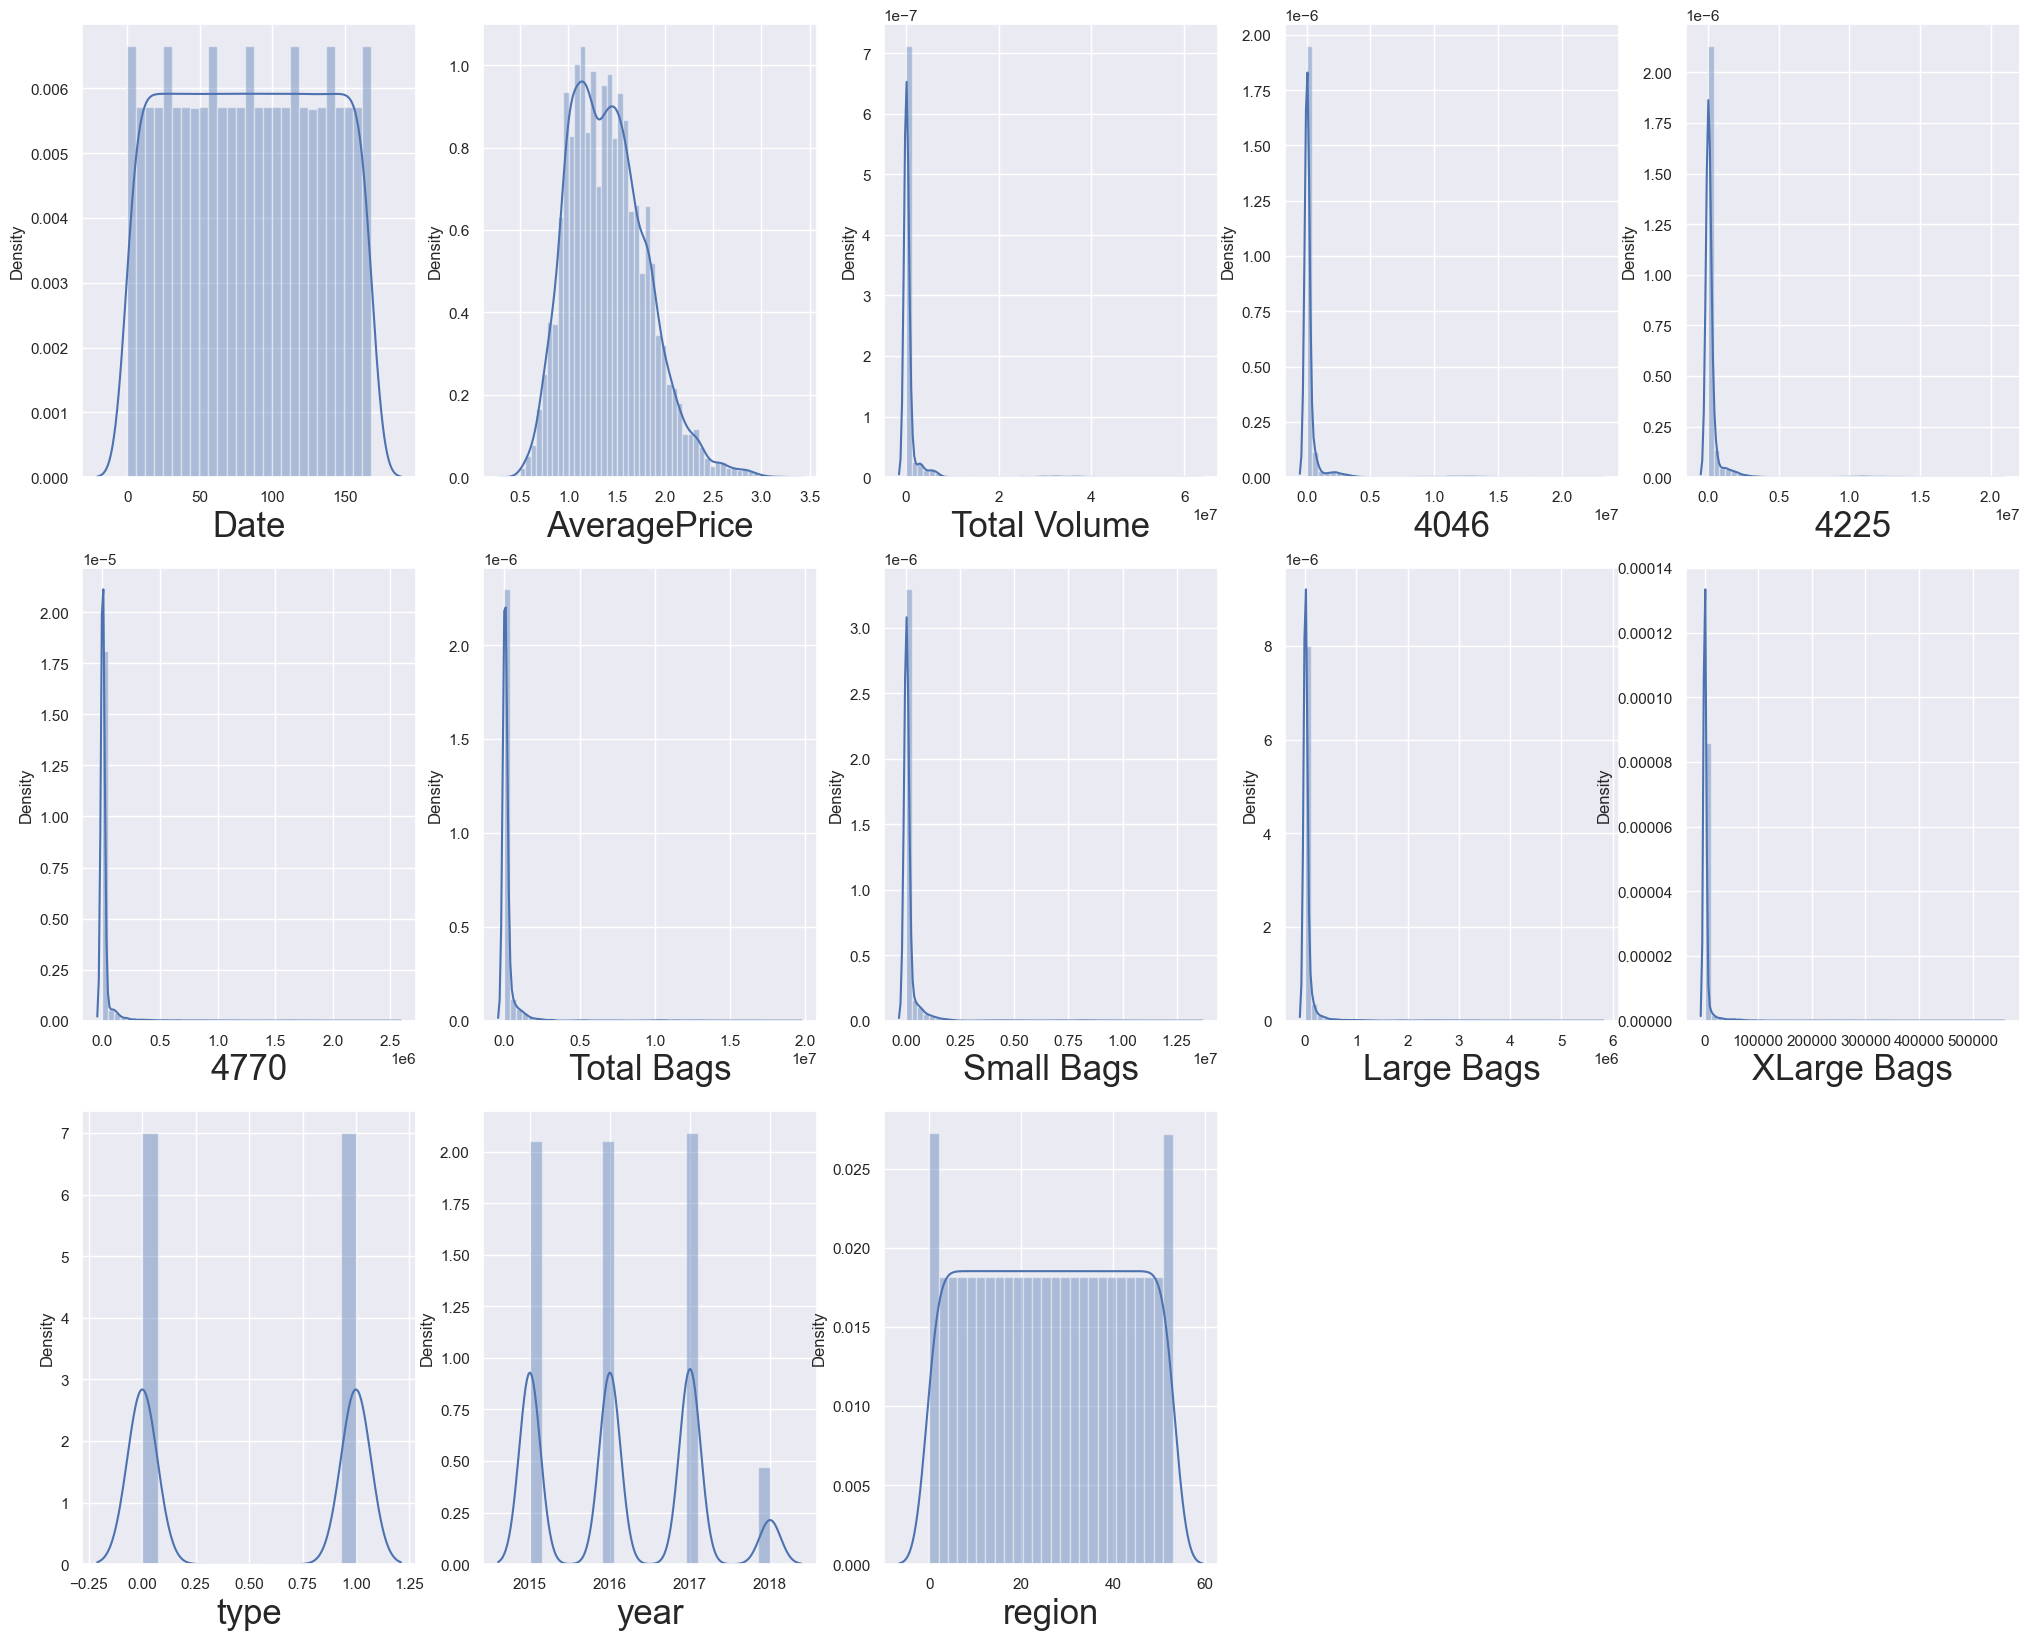

In [34]:
plt.figure(figsize=(25,20))
plot=1

for column in df2:
   if plot<=13:
       a=plt.subplot(3,5,plot)
       sns.distplot(df2[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [36]:
#Adjusting outliers:
from scipy.stats import zscore
score= zscore(df2)
absscore=np.abs(score)

filtering= (absscore<3).all(axis=1)
df2=df2[filtering]
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [41]:
#Model Building
#For 'region as a classifier'
x=df2.drop(columns=['region'])
y=df2['region']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=40)

In [42]:
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [43]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train) 

DecisionTreeClassifier()

In [44]:

score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:78.83%
report               precision    recall  f1-score   support

           0       0.83      0.86      0.84        99
           1       0.67      0.77      0.72        93
           2       0.89      0.92      0.91        93
           3       0.78      0.74      0.76       100
           4       0.86      0.84      0.85       105
           5       0.72      0.80      0.75        83
           6       0.98      0.93      0.96        58
           7       0.87      0.80      0.83       105
           8       0.97      0.79      0.87        90
           9       0.84      0.82      0.83       100
          10       0.63      0.69      0.66        91
          11       0.79      0.83      0.81        89
          12       0.80      0.72      0.76        79
          13       0.75      0.73      0.74        84
          14       0.83      0.82      0.83       111
          15       1.00      0.89      0.94        54
    

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
random_model=RandomForestClassifier()
random_model.fit(x_train,y_train) 

RandomForestClassifier()

In [48]:

score(random_model,x_train, x_test, y_train, y_test, train=True)
score(random_model,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:89.91%
report               precision    recall  f1-score   support

           0       0.90      0.95      0.93        99
           1       0.82      0.90      0.86        93
           2       0.95      0.99      0.97        93
           3       0.87      0.81      0.84       100
           4       0.96      0.97      0.97       105
           5       0.91      0.87      0.89        83
           6       0.98      0.97      0.97        58
           7       0.92      0.92      0.92       105
           8       0.99      0.91      0.95        90
           9       0.88      0.85      0.86       100
          10       0.78      0.88      0.83        91
          11       0.92      0.92      0.92        89
          12       0.97      0.96      0.97        79
          13       0.75      0.76      0.76        84
          14       0.94      0.98      0.96       111
          15       0.98      0.98      0.98        54
    

In [57]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [58]:
score(knn,x_train, x_test, y_train, y_test, train=True)
score(knn,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:71.00%
Test result
Accuracy score:61.76%
report               precision    recall  f1-score   support

           0       0.58      0.81      0.67        99
           1       0.56      0.65      0.60        93
           2       0.74      0.81      0.77        93
           3       0.74      0.73      0.73       100
           4       0.66      0.78      0.72       105
           5       0.46      0.53      0.49        83
           6       0.78      0.72      0.75        58
           7       0.60      0.70      0.65       105
           8       0.81      0.80      0.80        90
           9       0.56      0.63      0.59       100
          10       0.42      0.48      0.45        91
          11       0.56      0.72      0.63        89
          12       0.74      0.58      0.65        79
          13       0.52      0.68      0.59        84
          14       0.76      0.64      0.69       111
          15       0.61      0.46      0.53        54
     

In [59]:
#Model Building
#For 'average price' as a regression problem
x=df2.drop(columns=['AveragePrice'])
y=df2['AveragePrice']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=40)

In [56]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [64]:
from sklearn import metrics

In [57]:
reg = LinearRegression()
reg.fit(x_train.values, y_train.values)


LinearRegression()

In [58]:
y_pred = reg.predict(x_train.values)


In [65]:
r2_ = metrics.r2_score(y_train, y_pred)

print('R squared value: ',r2_)

R squared value:  0.4578424470051786


In [66]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rfmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=90, random_state=30)

In [67]:
y2_pred = rfmodel.predict(x_train.values)

In [68]:
r2= metrics.r2_score(y_train, y2_pred)

print('R squared value: ',r2)

R squared value:  0.9844826763522557


In [69]:
#we got a good model by randomforestregressor
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,160,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,159,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,158,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [71]:
#Question 3 answer:

In [76]:
df3=pd.read_csv(r"F:\HR.csv",sep=",")
df3


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [78]:
df3.shape

(1470, 35)

In [80]:
df3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [81]:
#Observations:
#Mean> standard Deviation in all columns except 'YearsSinceLastPromotion' and 'StockOptionLevel'

In [82]:
df3.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [107]:
#Let's replace 'Attrition' column
df3['Attrition'].replace({"Yes":1, "No":0}, inplace=True)  
df3['OverTime'].replace({"Yes":1, "No":0}, inplace=True) 

In [108]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df3['BusinessTravel'] = label.fit_transform(df3['BusinessTravel'])
df3['Department'] = label.fit_transform(df3['Department'])
df3['EducationField'] = label.fit_transform(df3['EducationField'])
df3['Gender'] = label.fit_transform(df3['Gender'])
df3['JobRole'] = label.fit_transform(df3['JobRole'])
df3['MaritalStatus'] = label.fit_transform(df3['MaritalStatus'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [109]:
df3.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

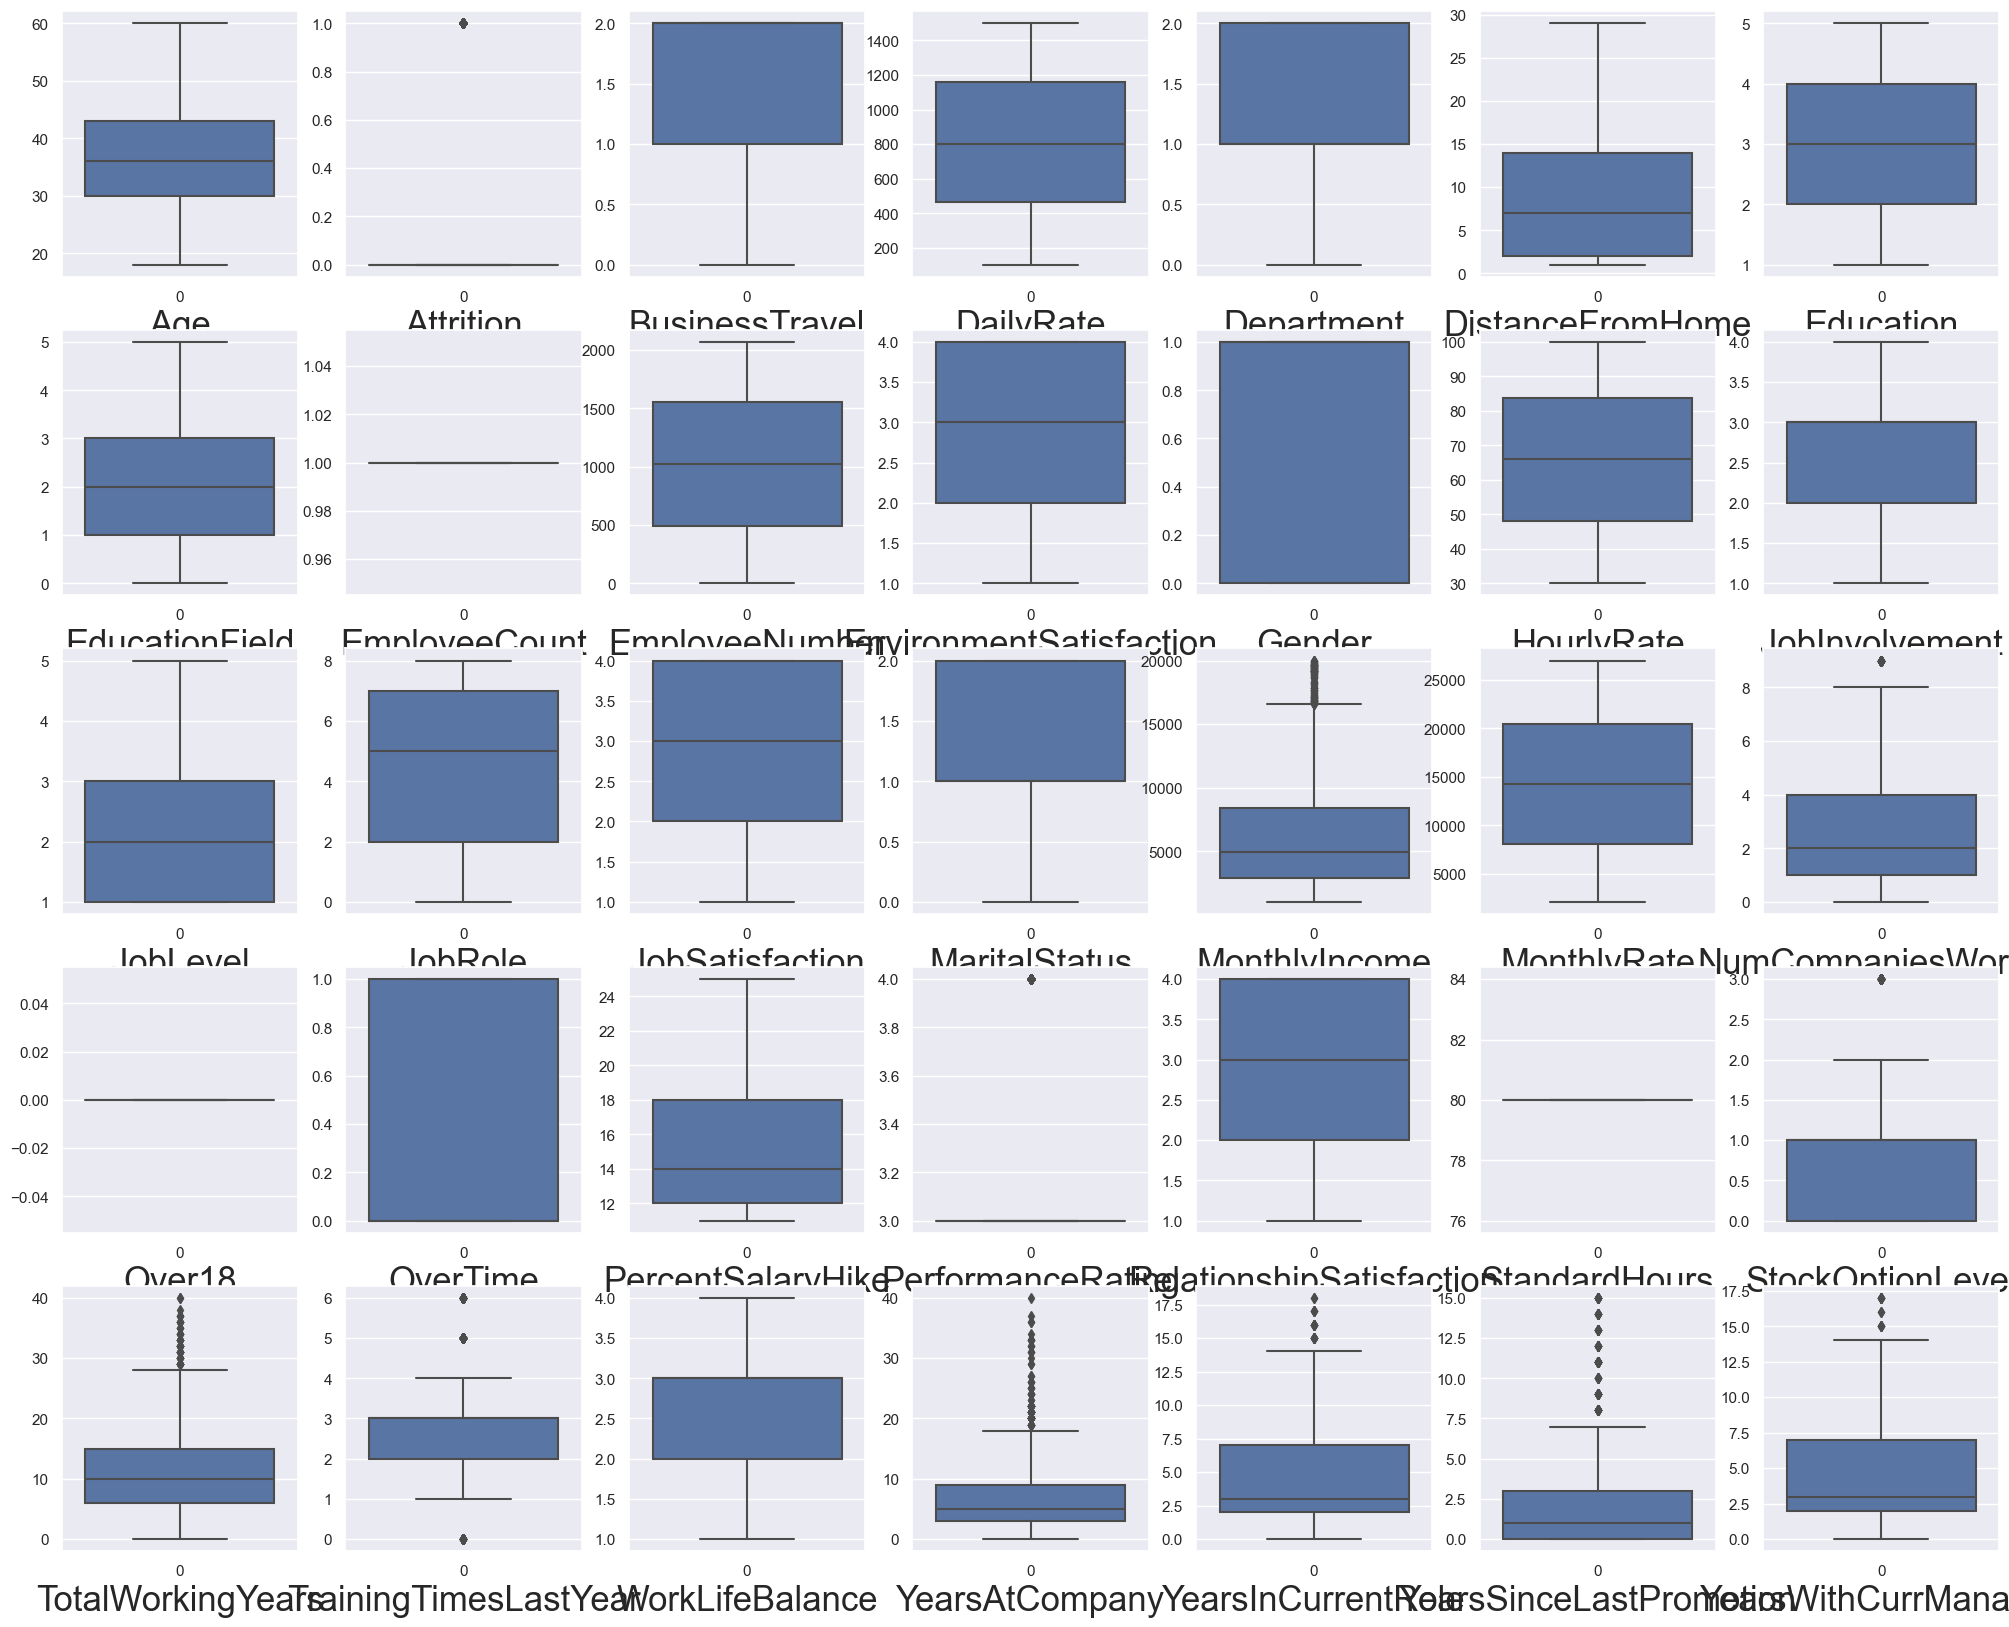

In [110]:
plt.figure(figsize=(25,20))
plot=1

for column in df3:
   if plot<=35:
       a=plt.subplot(5,7,plot)
       sns.boxplot(df3[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [113]:

from sklearn.metrics import accuracy_score
target = df3['Attrition']
features = df3.drop('Attrition', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, test_pred)

0.8316326530612245

<Axes: >

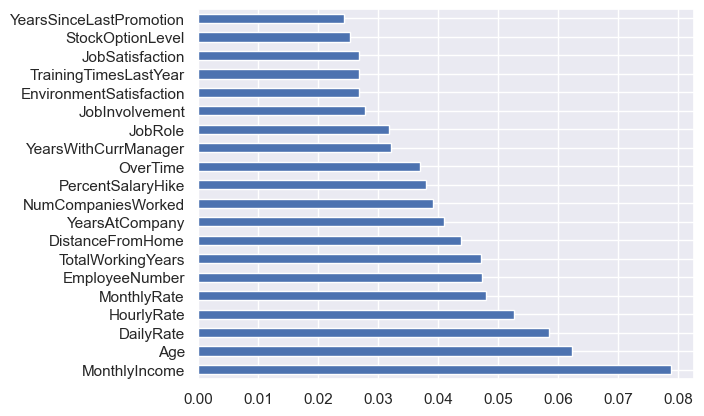

In [115]:
imp = pd.Series(model.feature_importances_, index=features.columns)
imp= imp.nlargest(20)
imp.plot(kind='barh')